# Proyecto de machine learning Sobre la prediccion de la calidad del vino

<a id="indice"></a> <br>
## Índice

1. [Introducción](#1)
2. [Obtención de datos](#2)
3. [Estudio de los datos y feature engineering](#3)
4. [Entrenamiento y evaluacion de los modelos](#4)  
    4.1. [Decisión de cambio a regression](#41)
5. [Conclusiones](#5)  
 

<a id="1"></a> <br>
## 1. Introducción :
En este modelo de machine learning quiero entrenar un modelo que califique el vino entre unos valores de 3 a 9, siendo 3 la peor calidad y 9 la mejor calidad posible. Lo haremos en funcion de los valores obtenidos en el laboratorio a la hora de la fabricación. De esta manera, cuando obtengamos la primera muestra de nuestro vino fabricado, sabremos de antemano las posibilidades de que sea un buen producto y podamos calcular el valor que pueda adquirir en el mercado.

En un principio afronté el problema como un modelo de clasificación, pero según fue avanzando el proyecto, observe mejores patrones y mayor utilidad a un problema de regresión, dandonos unos valores con mayor exactitud y con mejor evaluación.

Ahora pasaremos a entrar en mayor detalle al proceso.

<a id="2"></a> <br>
## 2. Obtención de datos 

Buscando información sobre el vino en la web, encontramos varios datasets muy útiles con los que trabajar.

Tras estudiarlos, decidimos centrarnos en este por su amplitud de parámetros y la manera en que se adaptaba a mis necesidades.

Para ver el enlace de Kaggle pulse [aquí](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine)


<a id="3"></a> <br>
## 3. Estudio de los datos y feature engineering

Una vez descargado el dataset procedemos a estudiarlo y ver como sacarle el mayor rendimiento.

Aquí os enseño como era el dataset:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/wine-quality-white-and-red.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Para ver mas detalladamente el proceso de feature engineering , encontrareis todos los pasos en el notebook [limpieza](../notebooks/limpieza.ipynb)

Finalmente nos quedaria este dataframe ya procesado y listo para entrenar :

In [5]:
df2 = pd.read_csv("../data/processed.csv")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,8.800000,6.000000,5.709677,0.3960
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,10.666592,5.784753,5.709677,0.4655
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,10.370000,6.000000,5.709677,0.5050
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,10.129167,5.750000,5.709677,0.5742
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,10.129167,5.750000,5.709677,0.5742


In [6]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_num,alc-sug,qua-sug,aci-type,alc-citr
count,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000,6486.000000
mean,7.214747,0.339582,0.318654,5.432562,0.056037,30.384443,115.453592,0.994688,3.218438,0.531244,10.492157,5.821153,1.246531,10.491968,5.818514,5.706767,0.577196
std,1.296742,0.164540,0.145366,4.697102,0.035059,17.182716,56.036163,0.002948,0.160726,0.148858,1.193207,0.870358,0.431024,0.558676,0.268017,0.005088,0.336707
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000,8.500000,4.000000,5.697872,0.121500
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,10.255556,5.709677,5.709677,0.404200
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,10.672460,5.812834,5.709677,0.479700
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,155.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,10.788827,5.917647,5.709677,0.662100
max,15.900000,1.580000,1.660000,31.600000,0.611000,118.500000,294.000000,1.010300,4.010000,2.000000,14.900000,9.000000,2.000000,13.400000,8.000000,5.709677,5.743400


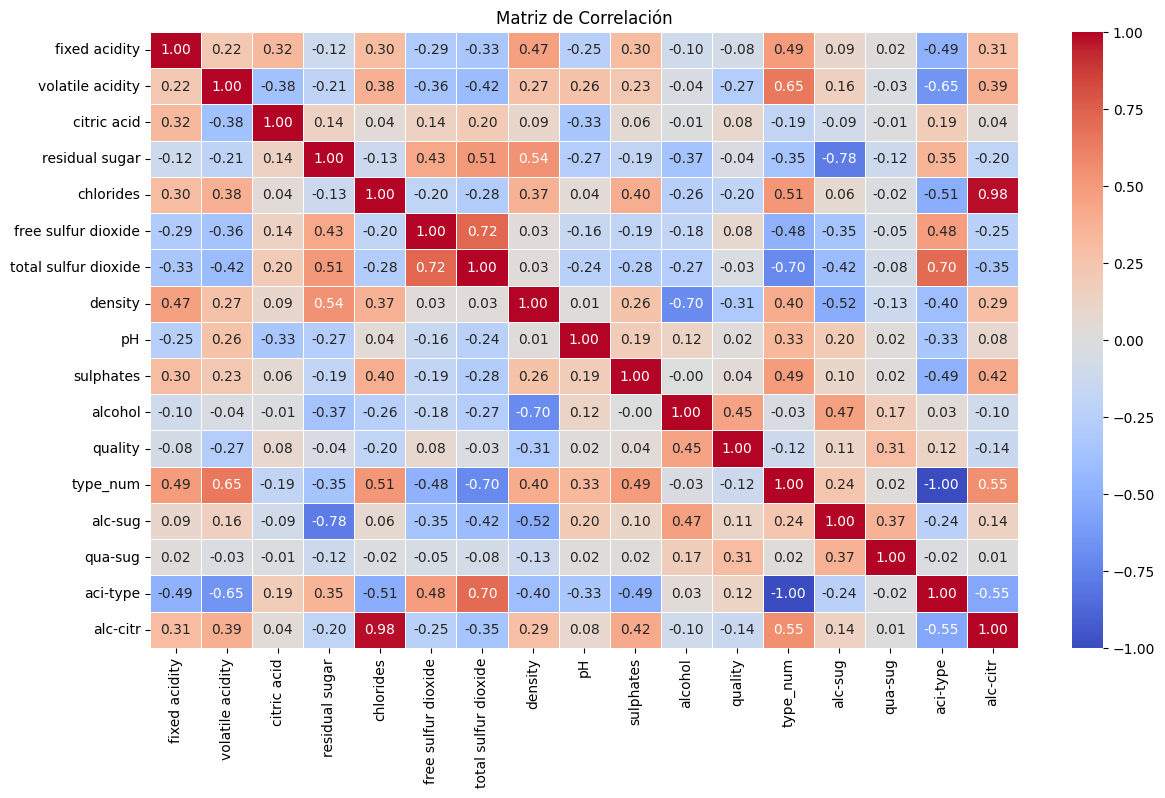

In [7]:
plt.figure(figsize=(14, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [8]:
df2.corrwith(df2['quality']).abs().sort_values(ascending=False)[1:]

alcohol                 0.446157
density                 0.312817
qua-sug                 0.307974
volatile acidity        0.267140
chlorides               0.202245
alc-citr                0.137735
type_num                0.121679
aci-type                0.121679
alc-sug                 0.112989
citric acid             0.084765
free sulfur dioxide     0.077363
fixed acidity           0.076340
sulphates               0.038305
residual sugar          0.037532
total sulfur dioxide    0.030893
pH                      0.019498
dtype: float64

Como podemos observar, tanto en el gráfico, como en el output, no hay una gran correlacion entre nuestro target y el resto de variables.

Tras varias pruebas usando diferentes variables, y habiendo eliminado parte de los outliers problemáticos, decidi entrenar mis modelos con todas las variables. 

También añadí 3 variables relacionando entre si a las ya existentes e hice un mapeo de la variable type para convertirla en un valor numérico.

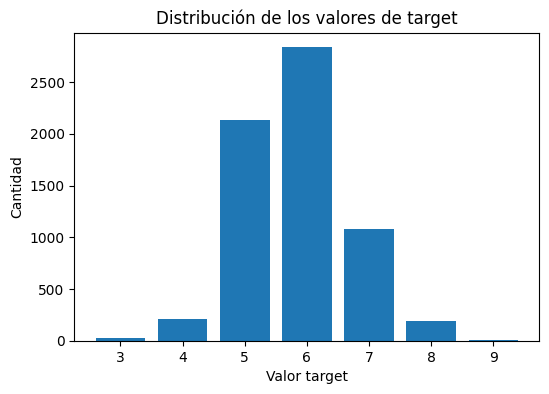

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(df2['quality'].value_counts().index,df2['quality'].value_counts())
plt.xlabel('Valor target')
plt.ylabel('Cantidad')
plt.title('Distribución de los valores de target')
plt.show()

Como vemos en la gráfica anterior, nuestro mayor problema era la gran diferencia en cuanto a la distribución de nuestro traget, ya que los valores de 3 y 9 eran minimos.

La estrategia que seguí fue la de ejecutar un RandomOverSampler para igualar todas las variables y que el modelo aprendiera bien todos los valores a predecir.

Probé tambien unos metodos menos agresivos, pero fue este el que mejor resultado me dió

<a id="4"></a> <br>
## 4. Entrenamiento y evaluación de los modelos

Una vez ejecutado la limpieza del dataframe y el estudio de las variables, empece con los entrenamiento de los modelos.

En principio, mi idea fue la de afrontar el problema como un modelo de clasificación, aunque despues de ver los resultados decidi pasar el modelo de regresión.

Aun así, os enseño en este caso primeramente los modelos de clasificación.

Realicé la evaluacion y entrenamiento de 6 modelos diferentes, 5 supervisados y uno no supervisado.

El que mejor resultado me dio fue el de Gradient Boosting, que paso a detallar a continuacón.

El resto de modelos lo podeis ver en mas detalle en los notebooks [supervisado](../notebooks/entrenamiento_evaluacion_clasif.ipynb) y en [no_supervisado](../notebooks/no_supervisado.ipynb)

In [6]:
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix

Aqui os enseño la manera en la que cargo el modelo entrenado en los noteboooks que enlazo en el parrafo anterior y hago la prediccion para mostraros el resultado final.

In [7]:
df = pd.read_csv('../data/test.csv')

In [8]:
with open('../models/trained_model_2gb.pkl', 'rb') as archivo:
    final_model = pickle.load(archivo)

X = df.drop(columns='quality')
y = df['quality']



y_pred = final_model.predict(X)

In [9]:
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Matriz de Confusión:")
print(cm)
print("\nTasa de Aciertos (Accuracy): {:.2f}%".format(accuracy * 100))

Matriz de Confusión:
[[  5   0   1   0   0   0]
 [  0  42   9   2   0   0]
 [  0   0 377  37   4   0]
 [  1   1  40 508  24   1]
 [  0   0   1  16 187   0]
 [  0   0   0   1   0  41]]

Tasa de Aciertos (Accuracy): 89.37%


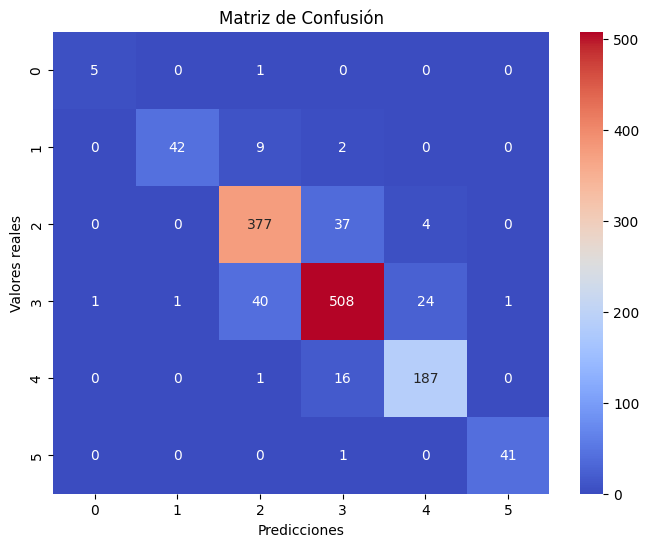

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm')
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

Como podemos ver, despues de hacer un pipeline con StandardScaler, nuestro clasificador y la hiperparametrización buscando lo que  mejor se ajuste a nuestro modelo obtenemos un modelo de una precision bastante alta. El modelo que mejor resultado nos dio fue el Gradient Boosting, por lo que lo hemos elegido como mejor modelo.


<a id="41"></a> <br>
## 4.1. Decisión de cambio a regression  

Una vez analizados los resultados, creí conveniente cambiar mi estrategia, ya que me parecio mejor saber el valor mas exacto y no obligar a mi modelo a darles unas notas cerradas por los valores de la clasificacion.

De esta manera obtenemos una valoracion mas real de nuestro producto, sin dejar una numeracion cerrada. 

En este caso, hice 7 modelos diferentes para probar todas las posibilidades, obteniendo de nuevo como mejor resultado el Gradient Boosting Regression.

En los notebooks tenemos toda la informacion y procesos de entrenamiento y evaluacion de los modelos. Os dejo el enlace a dichos notebooks aqui [regression](../notebooks/entrenamiento_evaluacion_regres.ipynb) y aqui [gráficas](../notebooks/graficas_regresion.ipynb)

Ahora os voy a enseñar el resultado de dicho proceso y su evaluacion :

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [14]:
df = pd.read_csv('../data/test.csv')

In [15]:
with open('../models/trained_model_reg_2GBR.pkl', 'rb') as archivo:
    final_model = pickle.load(archivo)

X = df.drop(columns='quality')
y = df['quality']



y_pred = final_model.predict(X)

In [16]:
mae = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.1437630517740377
Mean Absolute Percentage Error (MAPE): 2.622878504956207%
Mean Squared Error (MSE): 0.13138993696312906
Root Mean Squared Error (RMSE): 0.3624774985611232


Como podemos observar, hemos obtenido un MAE de 0.14 y un mape de un 2.62% de fallo, que es una tasa bastante aceptable a la hora de predecir. 

En el siguiente grafico nos indica la cantidad de residuos en funcion de las predicciones correctas. Cuanto mas cercano a la linea roja esten los puntos , significa que son valores más acertados y cuanto mas lejos quede mayor es el error. podemos observar que la mayor parte de los puntos nos salen muy cercanos al valor real, por lo que es un modelo bastante eficiente.

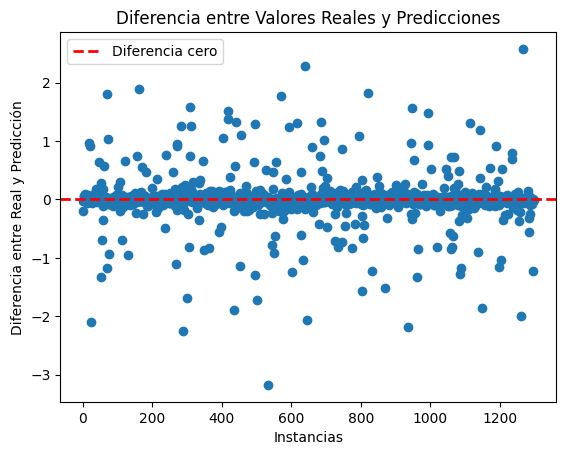

In [17]:
residuals = y - y_pred
plt.plot(residuals, marker='o', linestyle='None')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Diferencia cero')
plt.xlabel('Instancias')
plt.ylabel('Diferencia entre Real y Predicción')
plt.title('Diferencia entre Valores Reales y Predicciones')
plt.legend()
plt.show()

<a id="5"></a> <br>
## 5. Conclusiones

Como hemos podido observar, tanto en esta memoria, como en los notebooks adjuntados al proyecto con los detalles de cada proceso, nuestro modelo final seria un Gradient Boosting de Regression para obtener un MAPE de 2.62%.

Aun asi, y para poder seguir mejorando a lo largo del tiempo, he decidido dejar guardados todos los posibles modelos para poder seguir entrenandolos con nuevos datos, e incluso ir encontrando mas variables con las que trabajar.